In [145]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Question 1

Import nycovid.csv data and rename columns as necessary. Plot number of positive covid cases and the number of tests. Also, plot the related 7 days moving average (e.g., df. .rolling(window=7).mean().fillna(0)). Structure your plots as Figure 3.9.

In [146]:
nycovid_df = pd.read_csv('nycovid.csv')
nycovid_df = nycovid_df.rename(columns={'Test Date':'Date', 'Number Positive':'Positives', 'Number Tests':'Tests'})
nycovid_df.head(9)

,Date,County,Positives,Tests
0,3/1/2020,Albany,0.0,0.0
1,3/2/2020,Albany,0.0,0.0
2,3/3/2020,Albany,0.0,0.0
3,3/4/2020,Albany,0.0,0.0
4,3/5/2020,Albany,0.0,3.0
5,3/6/2020,Albany,0.0,0.0
6,3/7/2020,Albany,0.0,5.0
7,3/8/2020,Albany,0.0,2.0
8,3/9/2020,Albany,0.0,3.0


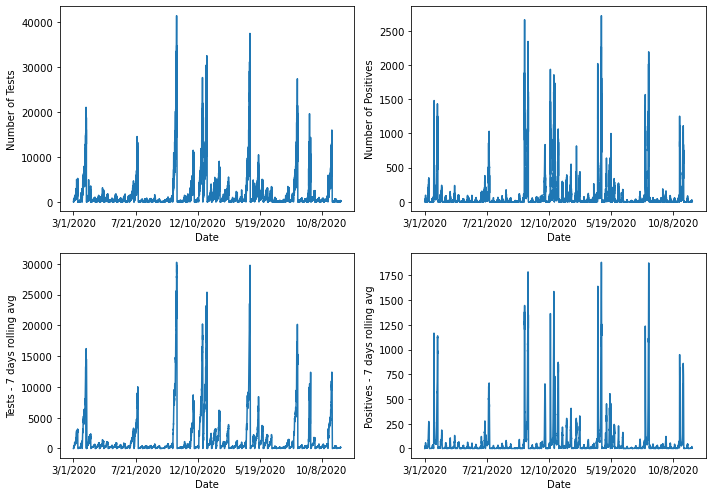

In [147]:
nycovid_df['Positive_Rolling_Avg']=nycovid_df.Positives.rolling(window=7).mean().fillna(0)
nycovid_df['Tests_Rolling_Avg']=nycovid_df.Tests.rolling(window=7).mean().fillna(0)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

ax = nycovid_df.plot(x='Date', y='Tests', legend=False, ax=axes[0][0])

ax.set_xlabel('Date')  # set x-axis label
ax.set_ylabel('Number of Tests')  # set y-axis label

ax = nycovid_df.plot(x='Date', y='Positives', legend=False, ax=axes[0][1])
ax.set_xlabel('Date')  # set x-axis label
ax.set_ylabel('Number of Positives')  # set y-axis label

ax = nycovid_df.plot(x='Date', y='Tests_Rolling_Avg', legend=False, ax=axes[1][0])
ax.set_xlabel('Date')  # set x-axis label
ax.set_ylabel('Tests - 7 days rolling avg')  # set y-axis label

ax = nycovid_df.plot(x='Date', y='Positive_Rolling_Avg', legend=False, ax=axes[1][1])
ax.set_xlabel('Date')  # set x-axis label
ax.set_ylabel('Positives - 7 days rolling avg')  # set y-axis label

plt.tight_layout()
plt.show()



### Interpretation

Big spikes in number of tests correlate to big spikes in positive cases. In general, testing and cases are very "spiky" in nature and can somewhat detect big waves of COVID, first in mid-march, a small spike in July and big spike at the end of summer, timed with the return to school.


# Question 2

Create a scatter plot (with counties as labels) of the average number of positive cases between September 2020 and February 11, 2021. Your plot should look like Figure 3.10.

In [148]:
nycovid_df['Date'] = pd.to_datetime(nycovid_df['Date'])
nycovid_df = nycovid_df.set_index(['Date'])
range_nycovid = nycovid_df.loc['2020-09-01':'2021-02-11']

byCounty = range_nycovid.groupby(by=[range_nycovid.County]).mean().reset_index()


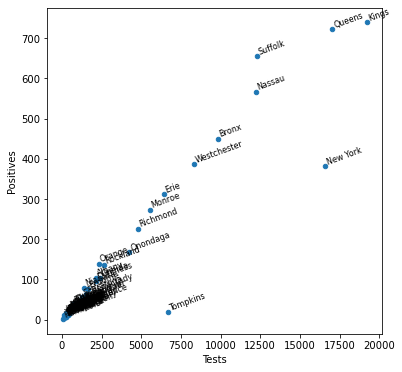

In [149]:
ax = byCounty.plot.scatter(x='Tests', y='Positives', figsize=(6, 6))
points = byCounty[['Tests','Positives','County']]
_ = points.apply(lambda x: 
             ax.text(*x, rotation=20, horizontalalignment='left',verticalalignment='bottom', fontsize=8), axis=1)
plt.show()

### Interpretation

In general, number of positive seems very corrolated to the number of tests and it seems very linear. Two outliers show up, Tompkins, where the number of positives cases is very low in relation to the number of tests they administered, when compared to other counties. Same goes for NYC.


# Question 3

Create box plots of the average rate of positive cases in these counties: ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens', 'Westchester', 'Erie',   'Monroe', 'Richmond', 'Onondaga', 'Tompkins'] (e.g., your boxplots may look like Figure 3.3)

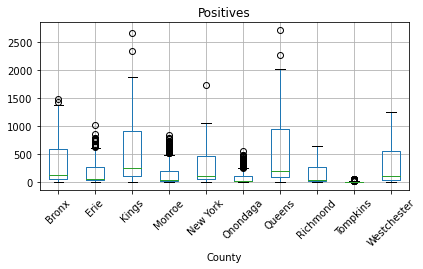

In [150]:
Counties = ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens', 'Westchester', 'Erie',   'Monroe', 'Richmond', 'Onondaga', 'Tompkins']

subset_nycovid = nycovid_df.loc[nycovid_df['County'].isin(Counties)]
subset_nycovid.boxplot(column='Positives', by='County')

plt.xticks(rotation=45)
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

### Interpretation

Kings and Queens county were the worst counties in terms of number of positives cases. Tompkins showed much fewer positives cases than anywere else.


# Question 4

Using the previous bulleted question's data and counties, create a heatmap of counties (y-axis) and months- September 2020 and February 11, 2021 (x-axis). Your heatmap may look like Figure 3.4.

<AxesSubplot:xlabel='County', ylabel='Date'>

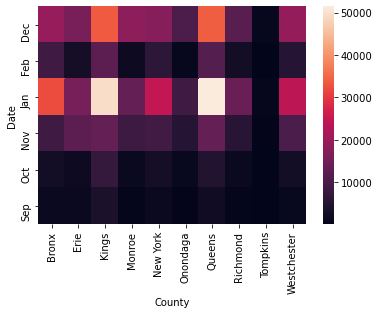

In [151]:
import calendar
import seaborn as sns

# Counties to focus on
Counties = ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens', 'Westchester', 'Erie',   'Monroe', 'Richmond', 'Onondaga', 'Tompkins']
subset_Counties = range_nycovid.loc[range_nycovid['County'].isin(Counties)]
# GroupBy Month and by County
subset_Counties_byMonth = subset_Counties.groupby(by=[subset_Counties.index.month, subset_Counties.County]).sum().reset_index()
subset_Counties_byMonth.reindex([2, 1, 12, 11, 10, 9])
# Replace the month numbers with Abbr
subset_Counties_byMonth['Date'] = subset_Counties_byMonth['Date'].apply(lambda x: calendar.month_abbr[x])
subset_Counties_byMonth_matrix = subset_Counties_byMonth.pivot("Date", "County", "Positives")

sns.heatmap(subset_Counties_byMonth_matrix)

### Interpretation

Based on the heatmap, Kings county in January and Queens in January were the worst areas with regards to number of cases. September, across the board, showed lower case count than other months.
